<H1>Linear Regression</H1><p>
Linear regression의 대상이 되는 트레이닝셋 데이터는 미국 성인의 키/몸무게 파일을 이용해보겠습니다. 키를 가지고 몸무게를 예측해보는 것입니다.

먼저 관련 파이썬 모듈들을 임포트합니다

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import scipy.stats as stats

이제 키/몸무게 파일을 로드해보겠습니다. 이제부터 <b>pandas</b> 모듈을 주로 사용하여 데이터의 값을 보고 분포를 살펴봅니다.

In [3]:
df = pd.read_csv('/Users/keeyong//Downloads/2018-march/weight-height.csv')

트레이닝 셋이 로드하면 첫번째로 해야할 일은 어떤 필드들이 있고 그 필드에 존재하는 값들의 범위, 존재여부 등을 확인해보는 것입니다. 먼저 파일의 처음 몇 레코드를 보겠습니다.

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [46]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [48]:
df.describe().round(2)

,Height,Weight
count,10000.00,10000.00
mean,66.37,161.44
std,3.85,32.11
min,54.26,64.70
25%,63.51,135.82
50%,66.32,161.21
75%,69.17,187.17
max,79.00,269.99


### 이제 이 데이터들을 matplotlib를 사용해서 한번 시각화해서 보겠습니다.

Text(0.5,0,'Height')

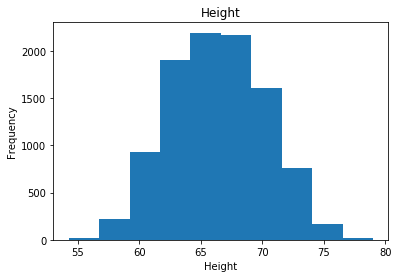

In [54]:
df['Height'].plot(kind='hist', title='Height')
plt.xlabel('Height')

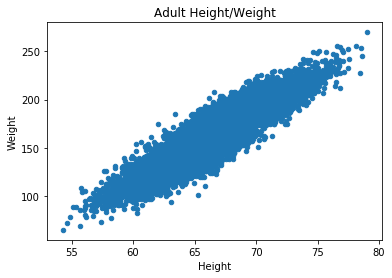

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Adult Height/Weight')

이 그래프 위에 빨간색으로 선을 그어봅니다.

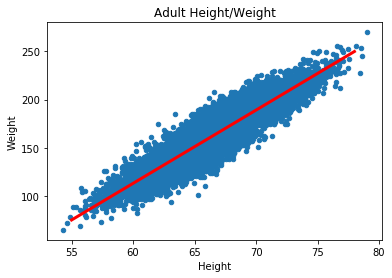

In [7]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Adult Height/Weight')
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

이제 이 그래프위에 실제로 직선을 그려가면서 이 패턴에 가장 최적화된 직선이 무엇일지 알아보겠습니다. 먼저 기울기가 w이고 y 절편이 b인 직선을 정의해보겠습니다.

In [9]:
def line(x, w=0, b=0):
    return x * w + b

In [10]:
x = np.linspace(55, 80, 100)

In [11]:
x

array([ 55.        ,  55.25252525,  55.50505051,  55.75757576,
        56.01010101,  56.26262626,  56.51515152,  56.76767677,
        57.02020202,  57.27272727,  57.52525253,  57.77777778,
        58.03030303,  58.28282828,  58.53535354,  58.78787879,
        59.04040404,  59.29292929,  59.54545455,  59.7979798 ,
        60.05050505,  60.3030303 ,  60.55555556,  60.80808081,
        61.06060606,  61.31313131,  61.56565657,  61.81818182,
        62.07070707,  62.32323232,  62.57575758,  62.82828283,
        63.08080808,  63.33333333,  63.58585859,  63.83838384,
        64.09090909,  64.34343434,  64.5959596 ,  64.84848485,
        65.1010101 ,  65.35353535,  65.60606061,  65.85858586,
        66.11111111,  66.36363636,  66.61616162,  66.86868687,
        67.12121212,  67.37373737,  67.62626263,  67.87878788,
        68.13131313,  68.38383838,  68.63636364,  68.88888889,
        69.14141414,  69.39393939,  69.64646465,  69.8989899 ,
        70.15151515,  70.4040404 ,  70.65656566,  70.90

In [12]:
yhat = line(x, w=0, b=0)

In [13]:
yhat

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

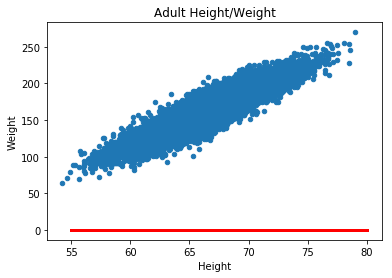

In [14]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Adult Height/Weight')
plt.plot(x, yhat, color='red', linewidth=3)

비용 함수 정의

In [20]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

트레이닝셋의 입력(features)과 라벨을 별도의 변수들로 저장

In [15]:
X = df[['Height']].values
y_true = df['Weight'].values

In [16]:
y_true

array([ 241.89356318,  162.31047252,  212.74085556, ...,  128.47531878,
        163.85246135,  113.64910268])

In [17]:
y_pred = line(X)

In [18]:
y_pred

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

In [21]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

(숙제) 각자 w와 b의 값을 바꿔가면서 플로팅을 해보면서 비용함수의 값이 어떻게 바뀌는지 보기 바랍니다

w의 값을 고정하고 b의 값만 바꿀 경우 비용이 어떻게 감소하는지 살펴봅시다. 비용의 변화를 그래프로 그려보겠습니다. 먼저 앞서 본 체중/키 그래프 위에 W를 2로 고정하고 b를 바꿔가면서 선을 그려보도록 하겠습니다.

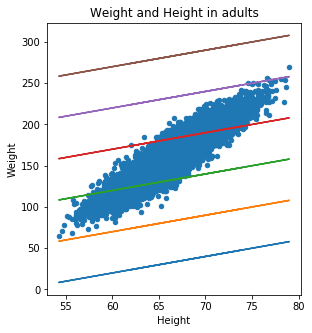

In [28]:
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# b의 값을 -100과 +150 사이에서 변화 (50씩)
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # 비용값을 여기 저장. 앞서 만든 비용함수로 실제값과 예측값의 차이를 계산
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

비용함수의 값을 앞서 B값에 대해 그래프로 그려봅니다

Text(0.5,0,'b')

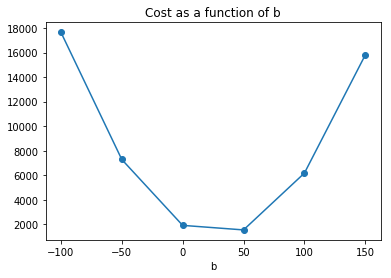

In [26]:
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## 이제 scikit learn의 linear regression을 실행해보겠습니다.
#### 성별과 신장 필드의 값을 바탕으로 트레이닝 셋의 feature를 만듭니다

In [29]:
X = df[['Gender', 'Height']].values
y_true = df['Weight'].values

#### 먼저 gender의 값을 숫자로 인코딩해줍니다

In [30]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
# 성별 정보는 0 인덱스에 존재
label_encoder = enc.fit(X[:, 0])
print ("Categorical classes:", label_encoder.classes_)

# 성별값이 어떤 숫자로 변경되었는지 프린트
integer_classes = label_encoder.transform(label_encoder.classes_)
print ("Integer classes:", integer_classes)

# 이제 feature 리스트에서 성별값을 숫자로 대치
t = label_encoder.transform(X[:, 0])
X[:, 0] = t
print(X)

Categorical classes: ['Female' 'Male']
Integer classes: [0 1]
[[1 73.847017017515]
 [1 68.78190404589029]
 [1 74.11010539178491]
 ..., 
 [0 63.8679922137577]
 [0 69.03424313073461]
 [0 61.944245879517204]]


### 이제 Scikit-Learn의 LinearRegression을 사용해서 모델을 학습합니다: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [31]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y_true)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
regr.predict([[0, 70], [1, 70]])

array([ 173.46238343,  192.84009395])

### Evaluating Model Performance using r2_score: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [34]:
y_pred = regr.predict(X)
from sklearn.metrics import r2_score
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.903


### train test and split (20% hold-out)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2)

In [38]:
len(X)

10000

In [39]:
len(X_train)

8000

In [41]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
y_test_pred = regr.predict(X_test)

In [44]:
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Test set is:	0.904


In [45]:
from sklearn.metrics import mean_squared_error as mse
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Test set is:	100.6


In [50]:
from sklearn.metrics import mean_squared_error as mse

In [51]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	185.9
The Mean Squared Error on the Test set is:	189.3


In [29]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.855
The R2 score on the Test set is:	0.849


In [47]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 19.66124987   5.94641407]


In [51]:
print('Coefficients: \n', regr.intercept_)

Coefficients: 
 -243.035438791
